<a href="https://colab.research.google.com/github/PranshuGhori/ClassificationPython/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [ ]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [ ]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)

In [ ]:
def model(X):
  return X @ w.t() + b

In [ ]:
preds = model(inputs)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [ ]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff*diff)/diff.numel()


In [ ]:
loss = mse(preds,targets)
loss.backward

<bound method Tensor.backward of tensor(7789.3252, grad_fn=<DivBackward0>)>

In [ ]:
preads = model(inputs)
preads

tensor([[-23.3319,  38.0617],
        [-22.0930,  63.2583],
        [-72.6053, 120.1583],
        [ -8.3549, -33.0814],
        [-22.0690, 105.7906]], grad_fn=<AddBackward0>)

In [ ]:
loss = mse(preds, targets)
loss

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='data/', download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 19.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.31MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.50MB/s]


In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 7


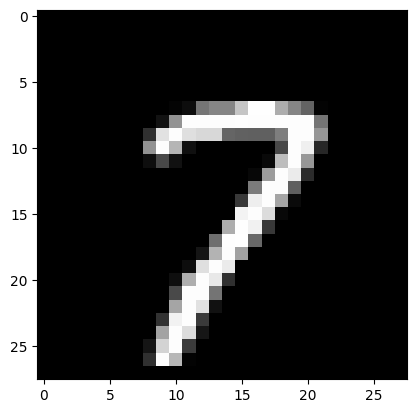

In [8]:
image, label = dataset[230]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]


In [11]:
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


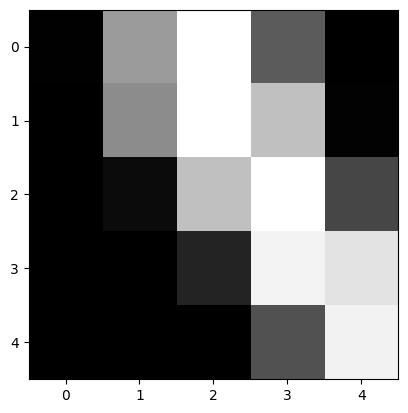

In [13]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

Training and Validation

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size = 128, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [17]:
model.weight

Parameter containing:
tensor([[-0.0010, -0.0170,  0.0246,  ...,  0.0179,  0.0008,  0.0277],
        [ 0.0193, -0.0128,  0.0014,  ...,  0.0200,  0.0294,  0.0112],
        [ 0.0259,  0.0047, -0.0211,  ..., -0.0040,  0.0173, -0.0204],
        ...,
        [-0.0115,  0.0221,  0.0170,  ...,  0.0042,  0.0236, -0.0006],
        [-0.0131,  0.0270,  0.0195,  ..., -0.0213,  0.0329, -0.0207],
        [ 0.0332, -0.0048, -0.0028,  ...,  0.0328,  0.0117, -0.0039]],
       requires_grad=True)

In [18]:
model.bias

Parameter containing:
tensor([-0.0195,  0.0214,  0.0003,  0.0247, -0.0245, -0.0100, -0.0073,  0.0057,
         0.0026, -0.0225], requires_grad=True)

In [19]:
for images, labels in train_loader:
  print(images.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([12

In [20]:
for images, labels in train_loader:
    print(images.shape)
    break

torch.Size([128, 1, 28, 28])


In [21]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [22]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out


In [23]:
model = MnistModel()
outputs = model(images)
print(outputs.shape)

torch.Size([128, 10])


In [24]:
import torch.nn.functional as F


In [25]:
probs = F.softmax(model(images), dim=1)

In [26]:
print('sample probabilities:\n', probs[:2].data)

sample probabilities:
 tensor([[0.0755, 0.0984, 0.0789, 0.0854, 0.0867, 0.1411, 0.1169, 0.1326, 0.1036,
         0.0810],
        [0.1194, 0.0933, 0.0924, 0.1021, 0.0877, 0.0955, 0.0788, 0.1026, 0.1210,
         0.1071]])


In [27]:
print("Sum: ", torch.sum(probs[0]).item())

Sum:  0.9999999403953552


In [28]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 8, 4, 3, 4, 9, 2, 6, 5, 3, 1, 4, 2, 6, 1, 3, 3, 9, 7, 9, 8, 4, 3, 6,
        6, 8, 6, 8, 6, 3, 5, 9, 5, 3, 3, 7, 5, 4, 4, 4, 4, 3, 1, 3, 5, 8, 6, 5,
        3, 2, 1, 6, 2, 7, 7, 4, 6, 8, 6, 2, 2, 7, 7, 6, 2, 2, 4, 4, 6, 2, 6, 4,
        2, 6, 8, 6, 8, 8, 8, 3, 1, 3, 3, 5, 5, 7, 9, 6, 3, 4, 9, 7, 5, 2, 0, 3,
        3, 9, 3, 2, 8, 5, 9, 3, 8, 3, 6, 9, 3, 2, 6, 2, 6, 6, 6, 7, 9, 9, 5, 8,
        3, 8, 2, 8, 2, 5, 2, 9])
tensor([0.1411, 0.1210, 0.1191, 0.1248, 0.1191, 0.1259, 0.1295, 0.1130, 0.1251,
        0.1179, 0.1117, 0.1345, 0.1519, 0.1276, 0.1223, 0.1312, 0.1337, 0.1242,
        0.1220, 0.1190, 0.1344, 0.1268, 0.1294, 0.1286, 0.1199, 0.1258, 0.1290,
        0.1336, 0.1367, 0.1329, 0.1200, 0.1149, 0.1265, 0.1378, 0.1353, 0.1307,
        0.1630, 0.1197, 0.1290, 0.1151, 0.1294, 0.1295, 0.1416, 0.1198, 0.1456,
        0.1231, 0.1194, 0.1317, 0.1209, 0.1375, 0.1172, 0.1385, 0.1564, 0.1319,
        0.1395, 0.1264, 0.1241, 0.1198, 0.1374, 0.1495, 0.1356, 0.1361, 0.1356,
       

In [29]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [30]:
accuracy(outputs, labels)

tensor(0.0703)

In [31]:
loss_fn = F.cross_entropy

In [32]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3448, grad_fn=<NllLossBackward0>)


In [33]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(),lr)
  history = []

  for epoch in range(epochs):

    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [34]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [35]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, result['val_loss'], result['val_acc']
    ))

model = MnistModel()

In [36]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.302149534225464, 'val_acc': 0.11995648592710495}

In [37]:
history1 = fit(5, 0.001, model, train_loader,  val_loader)

Epoch [0], val_loss: 1.9429, val_acc: 0.5823
Epoch [1], val_loss: 1.6771, val_acc: 0.7090
Epoch [2], val_loss: 1.4775, val_acc: 0.7517
Epoch [3], val_loss: 1.3263, val_acc: 0.7772
Epoch [4], val_loss: 1.2097, val_acc: 0.7943


In [38]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1180, val_acc: 0.8041
Epoch [1], val_loss: 1.0443, val_acc: 0.8106
Epoch [2], val_loss: 0.9840, val_acc: 0.8167
Epoch [3], val_loss: 0.9338, val_acc: 0.8217
Epoch [4], val_loss: 0.8915, val_acc: 0.8270


In [39]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8551, val_acc: 0.8312
Epoch [1], val_loss: 0.8237, val_acc: 0.8352
Epoch [2], val_loss: 0.7961, val_acc: 0.8375
Epoch [3], val_loss: 0.7717, val_acc: 0.8387
Epoch [4], val_loss: 0.7501, val_acc: 0.8407


In [40]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7307, val_acc: 0.8421
Epoch [1], val_loss: 0.7131, val_acc: 0.8448
Epoch [2], val_loss: 0.6972, val_acc: 0.8472
Epoch [3], val_loss: 0.6827, val_acc: 0.8489
Epoch [4], val_loss: 0.6694, val_acc: 0.8501


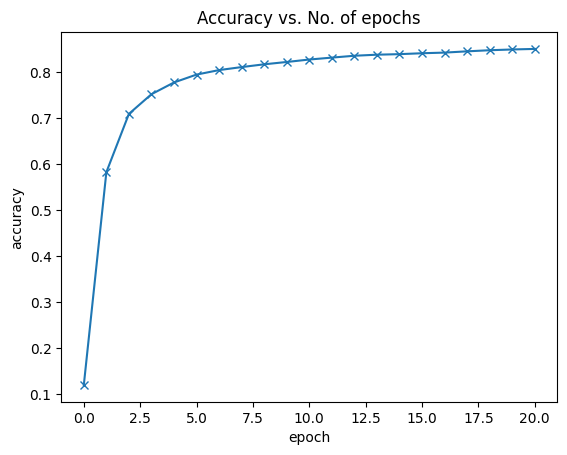

In [41]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [42]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Label: 7


torch.Size([1, 1, 28, 28])

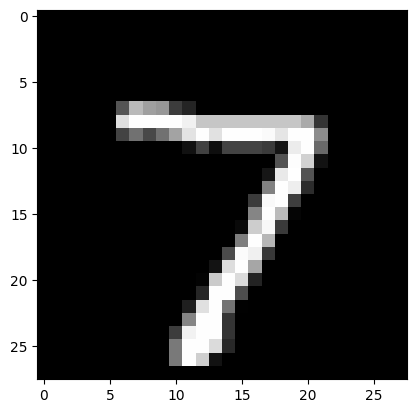

In [43]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label)
img.unsqueeze(0).shape

In [44]:
img_tensor = test_dataset.data.view(-1, 28*28).float()
test_dataset.targets

tensor([7, 2, 1,  ..., 4, 5, 6])

In [45]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 , Predicted: 7


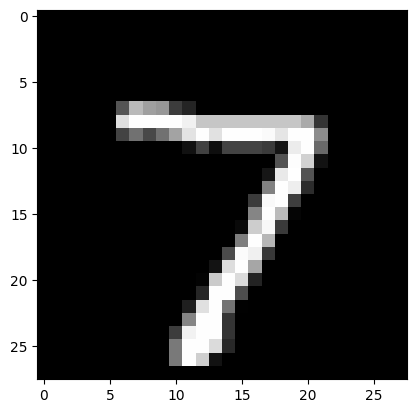

In [46]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


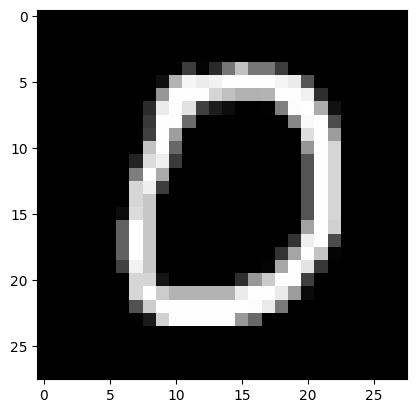

In [47]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


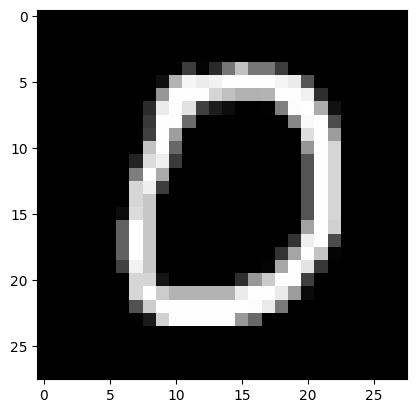

In [48]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [49]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6430190801620483, 'val_acc': 0.8594726324081421}

In [50]:
torch.save(model.state_dict(), 'mnist-linear.pth')

In [54]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0018,  0.0351, -0.0254,  ..., -0.0060, -0.0291,  0.0222],
                      [ 0.0177,  0.0024, -0.0165,  ..., -0.0132, -0.0118,  0.0082],
                      [ 0.0243,  0.0217,  0.0090,  ..., -0.0218, -0.0133, -0.0087],
                      ...,
                      [-0.0251,  0.0296, -0.0137,  ..., -0.0136, -0.0213,  0.0072],
                      [-0.0111, -0.0202, -0.0179,  ..., -0.0092,  0.0202, -0.0293],
                      [-0.0149,  0.0254,  0.0299,  ..., -0.0351,  0.0088, -0.0189]])),
             ('linear.bias',
              tensor([-0.0530,  0.0721,  0.0109, -0.0221, -0.0091,  0.0550, -0.0296,  0.0399,
                      -0.1080, -0.0060]))])

In [57]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-linear.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0018,  0.0351, -0.0254,  ..., -0.0060, -0.0291,  0.0222],
                      [ 0.0177,  0.0024, -0.0165,  ..., -0.0132, -0.0118,  0.0082],
                      [ 0.0243,  0.0217,  0.0090,  ..., -0.0218, -0.0133, -0.0087],
                      ...,
                      [-0.0251,  0.0296, -0.0137,  ..., -0.0136, -0.0213,  0.0072],
                      [-0.0111, -0.0202, -0.0179,  ..., -0.0092,  0.0202, -0.0293],
                      [-0.0149,  0.0254,  0.0299,  ..., -0.0351,  0.0088, -0.0189]])),
             ('linear.bias',
              tensor([-0.0530,  0.0721,  0.0109, -0.0221, -0.0091,  0.0550, -0.0296,  0.0399,
                      -0.1080, -0.0060]))])